# 机器学习算法（三）：K近邻(k-nearest neighbors)初探

## 1 KNN的介绍和应用
### 1.1 KNN的介绍

kNN(k-nearest neighbors)，中文翻译K近邻。我们常常听到一个故事：如果要了解一个人的经济水平，只需要知道他最好的5个朋友的经济能力，
对他的这五个人的经济水平求平均就是这个人的经济水平。这句话里面就包含着kNN的算法思想。

<img src='https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/3K/knn_demo.png'/>

示例 ：如上图，绿色圆要被决定赋予哪个类，是红色三角形还是蓝色四方形？如果K=3，由于红色三角形所占比例为2/3，绿色圆将被赋予红色三角形那个类，如果K=5，由于蓝色四方形比例为3/5，因此绿色圆被赋予蓝色四方形类。

**1) KNN建立过程**

    1 给定测试样本，计算它与训练集中的每一个样本的距离。
    2 找出距离近期的K个训练样本。作为测试样本的近邻。
    3 依据这K个近邻归属的类别来确定样本的类别。


**2) 类别的判定**

①投票决定，少数服从多数。取类别最多的为测试样本类别。

②加权投票法，依据计算得出距离的远近，对近邻的投票进行加权，距离越近则权重越大，设定权重为距离平方的倒数。

### 1.2 KNN的应用
KNN虽然很简单，但是人们常说"大道至简"，一句"物以类聚，人以群分"就能揭开其面纱，看似简单的KNN即能做分类又能做回归，
还能用来做数据预处理的缺失值填充。由于KNN模型具有很好的解释性，一般情况下对于简单的机器学习问题，我们可以使用KNN作为
Baseline，对于每一个预测结果，我们可以很好的进行解释。推荐系统的中，也有着KNN的影子。例如文章推荐系统中，
对于一个用户A，我们可以把和A最相近的k个用户，浏览过的文章推送给A。

机器学习领域中，数据往往很重要，有句话叫做:"数据决定任务的上限, 模型的目标是无限接近这个上限"。
可以看到好的数据非常重要，但是由于各种原因，我们得到的数据是有缺失的，如果我们能够很好的填充这些缺失值，
就能够得到更好的数据，以至于训练出来更鲁棒的模型。接下来我们就来看看KNN如果做分类，怎么做回归以及怎么填充空值。


## 2 实验室手册

### 2.1 实验环境

```
1. python3.7
2. numpy >= '1.16.4'
3. sklearn >= '0.23.1'
```

### 2.2 学习目标
1. 了解KNN怎么做分类问题
2. 了解KNN如何做回归
3. 了解KNN怎么做空值填充, 如何使用knn构建带有空值的pipeline

### 2.3 代码流程
1. 二维数据集--knn分类
    + Step1: 库函数导入
    + Step2: 数据导入 
    + Step3: 模型训练&可视化
    + Step4: 原理简析

2. 莺尾花数据集--kNN分类
    + Step1: 库函数导入
    + Step2: 数据导入&分析 
    + Step3: 模型训练 
    + Step4: 模型预测&可视化
     
3. 模拟数据集--kNN回归
    + Step1: 库函数导入
    + Step2: 数据导入&分析 
    + Step3: 模型训练&可视化

4. 马绞痛数据--kNN数据预处理+kNN分类pipeline
    + Step1: 库函数导入
    + Step2: 数据导入&分析 
    + Step3: KNNImputer空值填充--使用和原理介绍
    + Step4: KNNImputer空值填充--欧式距离的计算
    + Step5: 基于pipeline模型预测&可视化

## 2.4 算法实战

### 2.4.1 Demo数据集--kNN分类

**Step1: 库函数导入**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

**Step2: 数据导入**

In [2]:
# 使用莺尾花数据集的前两维数据，便于数据可视化
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

**Step3: 模型训练&可视化**

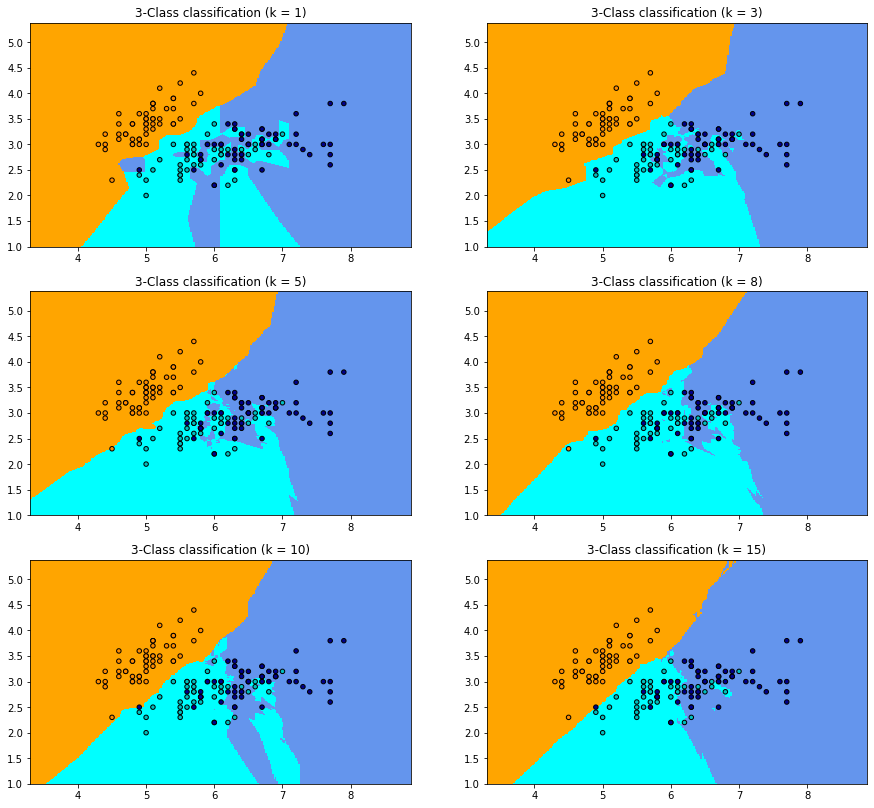

In [3]:
k_list = [1, 3, 5, 8, 10, 15]
h = .02
# 创建不同颜色的画布
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(15,14))
# 根据不同的k值进行可视化
for ind,k in enumerate(k_list):
    clf = KNeighborsClassifier(k)
    clf.fit(X, y)
    # 画出决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # 根据边界填充颜色
    Z = Z.reshape(xx.shape)

    plt.subplot(321+ind)  
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # 数据点可视化到画布
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% k)

plt.show()

**Step4: 原理简析**

如果选择较小的K值，就相当于用较小的领域中的训练实例进行预测，例如当k=1的时候，在分界点位置的数据很容易受到局部的影响，图中蓝色的部分中还有部分绿色块，主要是数据太局部敏感。当k=15的时候，不同的数据基本根据颜色分开，当时进行预测的时候，会直接落到对应的区域，模型相对更加鲁棒。


### 2.4.2 莺尾花数据集--kNN分类

**Step1: 库函数导入**

In [1]:
import numpy as np
# 加载莺尾花数据集
from sklearn import datasets
# 导入KNN分类器
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

**Step2: 数据导入&分析**

In [2]:
# 导入莺尾花数据集
iris = datasets.load_iris()

X = iris.data
y = iris.target
# 得到训练集合和验证集合, 8: 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Step3: 模型训练**

这里我们设置参数k(n_neighbors)=5, 使用欧式距离(metric=minkowski & p=2)

In [3]:
# 训练模型
clf = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
clf.fit(X_train, y_train)

KNeighborsClassifier()

**Step4:模型预测&可视化**

In [4]:
# 预测
X_pred = clf.predict(X_test)
acc = sum(X_pred == y_test) / X_pred.shape[0]
print("预测的准确率ACC: %.3f" % acc)

预测的准确率ACC: 0.933


我们用表格来看一下KNN的训练和预测过程。这里用表格进行可视化：

1. 训练数据[表格对应list]

|feat_1|feat_2|feat_3|feat_4|label|
|---|---|---|---|---|
|5.1| 3.5| 1.4| 0.2| **0** |
|4.9| 3. | 1.4| 0.2| **0** |
|4.7| 3.2| 1.3| 0.2| **0** |
|4.6| 3.1| 1.5| 0.2| **0** |
|6.4| 3.2| 4.5| 1.5| **1** |
|6.9| 3.1| 4.9| 1.5| **1** |
|5.5| 2.3| 4. | 1.3| **1** |
|6.5| 2.8| 4.6| 1.5| **1** |
|5.8| 2.7| 5.1| 1.9| **2** |
|7.1| 3. | 5.9| 2.1| **2** |
|6.3| 2.9| 5.6| 1.8| **2** |
|6.5| 3. | 5.8| 2.2| **2** |

2. knn.fit(X, y)的过程可以简单认为是表格存储

|feat_1|feat_2|feat_3|feat_4|label|
|---|---|---|---|---|
|5.1| 3.5| 1.4| 0.2| **0** |
|4.9| 3. | 1.4| 0.2| **0** |
|4.7| 3.2| 1.3| 0.2| **0** |
|4.6| 3.1| 1.5| 0.2| **0** |
|6.4| 3.2| 4.5| 1.5| <font color="coral">**1**</font> |
|6.9| 3.1| 4.9| 1.5| <font color="coral">**1**</font> |
|5.5| 2.3| 4. | 1.3| <font color="coral">**1**</font> |
|6.5| 2.8| 4.6| 1.5| <font color="coral">**1**</font> |
|5.8| 2.7| 5.1| 1.9| <font color="lilac">**2**</font> |
|7.1| 3. | 5.9| 2.1| <font color="lilac">**2**</font> |
|6.3| 2.9| 5.6| 1.8| <font color="lilac">**2**</font> |
|6.5| 3. | 5.8| 2.2| <font color="lilac">**2**</font> |

3. knn.predict(x)预测过程会计算x和所有训练数据的距离
这里我们使用欧式距离进行计算, 预测过程如下

$$
x = [5. , 3.6, 1.4, 0.2] \\ 
y=0
$$

step1: 计算x和所有训练数据的距离

|feat_1|feat_2|feat_3|feat_4|距离|label|
|---|---|---|---|---|---|
|5.1| 3.5| 1.4| 0.2|<font color="green">**0.14142136**</font>| **0** |
|4.9| 3. | 1.4| 0.2|<font color="green">**0.60827625**</font>| **0** |
|4.7| 3.2| 1.3| 0.2|<font color="green">**0.50990195**</font>| **0** |
|4.6| 3.1| 1.5| 0.2|<font color="green">**0.64807407**</font>| **0** |
|6.4| 3.2| 4.5| 1.5|<font color="green">**3.66333182**</font>| <font color="coral">**1**</font> |
|6.9| 3.1| 4.9| 1.5|<font color="green">**4.21900462**</font>| <font color="coral">**1**</font> |
|5.5| 2.3| 4. | 1.3|<font color="green">**3.14801525**</font>| <font color="coral">**1**</font> |
|6.5| 2.8| 4.6| 1.5|<font color="green">**3.84967531**</font>| <font color="coral">**1**</font> |
|5.8| 2.7| 5.1| 1.9|<font color="green">**4.24617475**</font>| <font color="lilac">**2**</font> |
|7.1| 3. | 5.9| 2.1|<font color="green">**5.35070089**</font>| <font color="lilac">**2**</font> |
|6.3| 2.9| 5.6| 1.8|<font color="green">**4.73075047**</font>| <font color="lilac">**2**</font> |
|6.5| 3. | 5.8| 2.2|<font color="green">**5.09607692**</font>| <font color="lilac">**2**</font> |


step2: 根据距离进行编号排序

|距离升序编号|feat_1|feat_2|feat_3|feat_4|距离|label|
|---|---|---|---|---|---|---|
|<font color="indigo">**1**</font>|5.1| 3.5| 1.4| 0.2|<font color="green">**0.14142136**</font>| **0** |
|<font color="indigo">**3**</font>|4.9| 3. | 1.4| 0.2|<font color="green">**0.60827625**</font>| **0** |
|<font color="indigo">**2**</font>|4.7| 3.2| 1.3| 0.2|<font color="green">**0.50990195**</font>| **0** |
|<font color="indigo">**4**</font>|4.6| 3.1| 1.5| 0.2|<font color="green">**0.64807407**</font>| **0** |
|<font color="indigo">**6**</font>|6.4| 3.2| 4.5| 1.5|<font color="green">**3.66333182**</font>| <font color="coral">**1**</font> |
|<font color="indigo">**8**</font>|6.9| 3.1| 4.9| 1.5|<font color="green">**4.21900462**</font>| <font color="coral">**1**</font> |
|<font color="indigo">**5**</font>|5.5| 2.3| 4. | 1.3|<font color="green">**3.14801525**</font>| <font color="coral">**1**</font> |
|<font color="indigo">**7**</font>|6.5| 2.8| 4.6| 1.5|<font color="green">**3.84967531**</font>| <font color="coral">**1**</font> |
|<font color="indigo">**9**</font>|5.8| 2.7| 5.1| 1.9|<font color="green">**4.24617475**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**12**</font>|7.1| 3. | 5.9| 2.1|<font color="green">**5.35070089**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**10**</font>|6.3| 2.9| 5.6| 1.8|<font color="green">**4.73075047**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**11**</font>|6.5| 3. | 5.8| 2.2|<font color="green">**5.09607692**</font>| <font color="lilac">**2**</font> |


step3: 我们设置k=5,选择距离最近的k个样本进行投票

|距离升序编号|feat_1|feat_2|feat_3|feat_4|距离|label|
|---|---|---|---|---|---|---|
|<font color="red">**1**</font>|5.1| 3.5| 1.4| 0.2|<font color="red">**0.14142136**</font>| **0** |
|<font color="red">**3**</font>|4.9| 3. | 1.4| 0.2|<font color="red">**0.60827625**</font>| **0** |
|<font color="red">**2**</font>|4.7| 3.2| 1.3| 0.2|<font color="red">**0.50990195**</font>| **0** |
|<font color="red">**4**</font>|4.6| 3.1| 1.5| 0.2|<font color="red">**0.64807407**</font>| **0** |
|<font color="indigo">**6**</font>|6.4| 3.2| 4.5| 1.5|<font color="green">**3.66333182**</font>| <font color="coral">**1** |
|<font color="indigo">**8**</font>|6.9| 3.1| 4.9| 1.5|<font color="green">**4.21900462**</font>| <font color="coral">**1** |
|<font color="red">**5**</font>|5.5| 2.3| 4. | 1.3|<font color="red">**3.14801525**</font>| <font color="coral">**1** </font>|
|<font color="indigo">**7**</font>|6.5| 2.8| 4.6| 1.5|<font color="green">**3.84967531**</font>| <font color="coral">**1**</font> |
|<font color="indigo">**9**</font>|5.8| 2.7| 5.1| 1.9|<font color="green">**4.24617475**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**12**</font>|7.1| 3. | 5.9| 2.1|<font color="green">**5.35070089**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**10**</font>|6.3| 2.9| 5.6| 1.8|<font color="green">**4.73075047**</font>| <font color="lilac">**2**</font> |
|<font color="indigo">**11**</font>|6.5| 3. | 5.8| 2.2|<font color="green">**5.09607692**</font>| <font color="lilac">**2**</font> |


step4: k近邻的label进行投票

nn_labels = [0, 0, 0, 0, 1] --> 得到最后的结果0。


### 2.4.3 模拟数据集--kNN回归

**Step1: 库函数导入**

In [5]:
#Demo来自sklearn官网
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

**Step2: 数据导入&分析**

In [6]:
np.random.seed(0)
# 随机生成40个(0, 1)之前的数，乘以5，再进行升序
X = np.sort(5 * np.random.rand(40, 1), axis=0)
# 创建[0, 5]之间的500个数的等差数列, 作为测试数据
T = np.linspace(0, 5, 500)[:, np.newaxis]
# 使用sin函数得到y值，并拉伸到一维
y = np.sin(X).ravel()
# Add noise to targets[y值增加噪声]
y[::5] += 1 * (0.5 - np.random.rand(8))

**Step3: 模型训练&预测可视化**

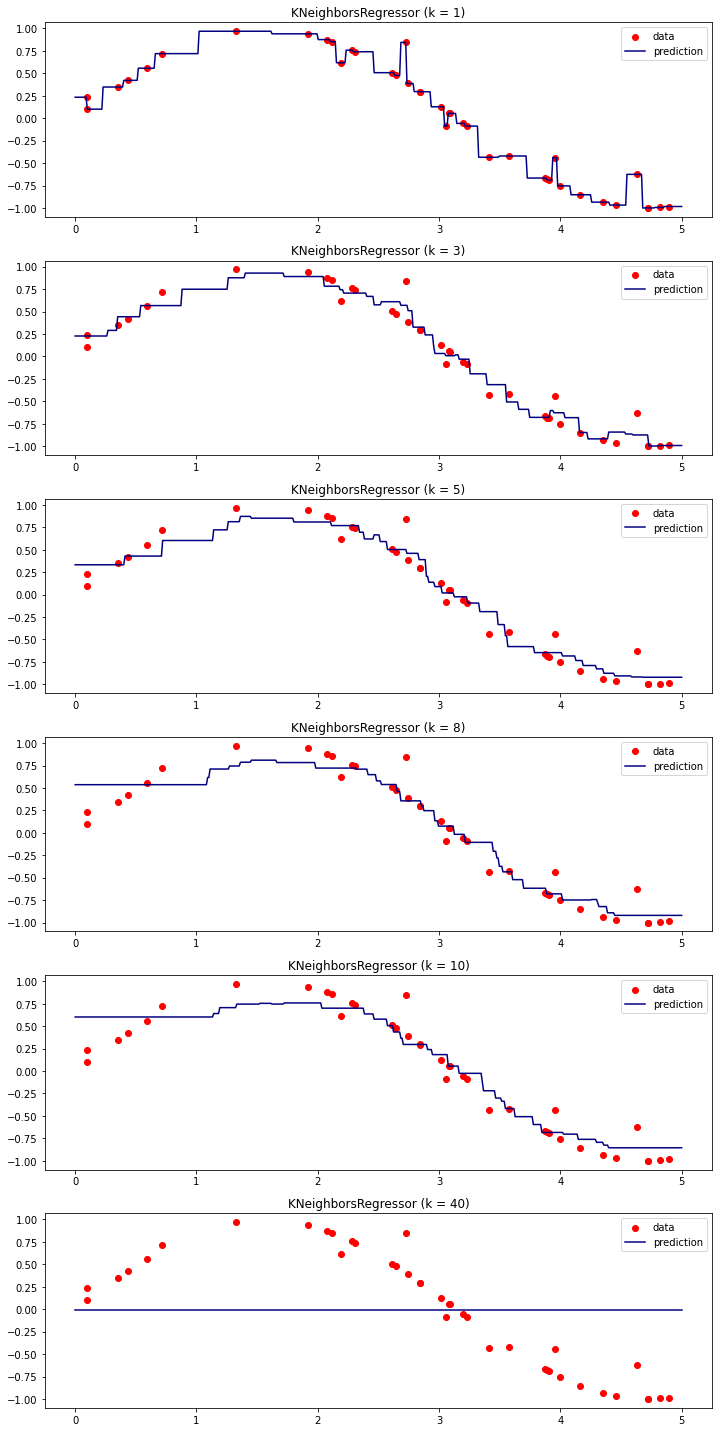

In [7]:
# #############################################################################
# Fit regression model
# 设置多个k近邻进行比较
n_neighbors = [1, 3, 5, 8, 10, 40]
# 设置图片大小
plt.figure(figsize=(10,20))
for i, k in enumerate(n_neighbors):
    # 默认使用加权平均进行计算predictor
    clf = KNeighborsRegressor(n_neighbors=k, p=2, metric="minkowski")
    # 训练
    clf.fit(X, y)
    # 预测
    y_ = clf.predict(T)
    plt.subplot(6, 1, i + 1)
    plt.scatter(X, y, color='red', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i)" % (k))

plt.tight_layout()
plt.show()

**Step4:模型分析**

当k=1时，预测的结果只和最近的一个训练样本相关，从预测曲线中可以看出当k很小时候很容易发生过拟合。

当k=40时，预测的结果和最近的40个样本相关，因为我们只有40个样本，此时是所有样本的平均值，此时所有预测值都是均值，很容易发生欠拟合。

一般情况下，使用knn的时候，根据数据规模我们会从[3, 20]之间进行尝试，选择最好的k，例如上图中的[3, 10]相对1和40都是还不错的选择。

### 2.4.4 马绞痛数据--kNN数据预处理+kNN分类pipeline

In [1]:
# 下载需要用到的数据集
!wget https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/3K/horse-colic.csv

--2022-02-21 02:54:59--  https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/3K/horse-colic.csv
Resolving tianchi-media.oss-cn-beijing.aliyuncs.com (tianchi-media.oss-cn-beijing.aliyuncs.com)... 59.110.185.93
Connecting to tianchi-media.oss-cn-beijing.aliyuncs.com (tianchi-media.oss-cn-beijing.aliyuncs.com)|59.110.185.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25151 (25K) [text/csv]
Saving to: ‘horse-colic.csv’

horse-colic.csv     100%[===================>]  24.56K  --.-KB/s    in 0.04s   

2022-02-21 02:54:59 (616 KB/s) - ‘horse-colic.csv’ saved [25151/25151]



In [2]:
# 下载数据集介绍
!wget https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/3K/horse-colic.names

--2022-02-21 02:55:05--  https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/3K/horse-colic.names
Resolving tianchi-media.oss-cn-beijing.aliyuncs.com (tianchi-media.oss-cn-beijing.aliyuncs.com)... 59.110.185.93
Connecting to tianchi-media.oss-cn-beijing.aliyuncs.com (tianchi-media.oss-cn-beijing.aliyuncs.com)|59.110.185.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9011 (8.8K) [application/octet-stream]
Saving to: ‘horse-colic.names’

horse-colic.names   100%[===================>]   8.80K  --.-KB/s    in 0.009s  

2022-02-21 02:55:05 (964 KB/s) - ‘horse-colic.names’ saved [9011/9011]



**Step1: 库函数导入**

In [3]:
import numpy as np
import pandas as pd
# kNN分类器
from sklearn.neighbors import KNeighborsClassifier
# kNN数据空值填充
from sklearn.impute import KNNImputer
# 计算带有空值的欧式距离
from sklearn.metrics.pairwise import nan_euclidean_distances
# 交叉验证
from sklearn.model_selection import cross_val_score
# KFlod的函数
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Step2: 数据导入&分析**

```
2,1,530101,38.50,66,28,3,3,?,2,5,4,4,?,?,?,3,5,45.00,8.40,?,?,2,2,11300,00000,00000,2
1,1,534817,39.2,88,20,?,?,4,1,3,4,2,?,?,?,4,2,50,85,2,2,3,2,02208,00000,00000,2
2,1,530334,38.30,40,24,1,1,3,1,3,3,1,?,?,?,1,1,33.00,6.70,?,?,1,2,00000,00000,00000,1
1,9,5290409,39.10,164,84,4,1,6,2,2,4,4,1,2,5.00,3,?,48.00,7.20,3,5.30,2,1,02208,00000,00000,1
2,1,530255,37.30,104,35,?,?,6,2,?,?,?,?,?,?,?,?,74.00,7.40,?,?,2,2,04300,00000,00000,2
......
```

数据集介绍：[horse-colic.names](./horse-colic.names)

数据中的'?'表示空值，如果我们使用KNN分类器，'?'不能数值，不能进行计算，因此我们需要进行数据预处理对空值进行填充。

这里我们使用KNNImputer进行空值填充，KNNImputer填充的原来很简单，计算每个样本最近的k个样本，进行空值填充。

我们先来看下KNNImputer的运行原理：

**Step3: KNNImputer空值填充--使用和原理介绍**

In [12]:
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, metric='nan_euclidean')
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

带有空值的欧式距离计算公式

In [13]:
nan_euclidean_distances([[np.nan, 6, 5], [3, 4, 3]], [[3, 4, 3], [1, 2, np.nan], [8, 8, 7]])

array([[3.46410162, 6.92820323, 3.46410162],
       [0.        , 3.46410162, 7.54983444]])

**Step4: KNNImputer空值填充--欧式距离的计算**

样本[1, 2, np.nan] 最近的2个样本是: [3, 4, 3] [np.nan, 6, 5], 计算距离的时候使用欧式距离，只关注非空样本。
[1, 2, np.nan] 填充之后得到 [1, 2, (3 + 5) / 2] = [1, 2, 4]

**正常的欧式距离**
$$
x = [3, 4, 3], y = [8, 8, 7] \\
\sqrt{(3-8)^2 + (4-8)^2 + (3-7)^2} = \sqrt{33} = 7.55
$$

**带有空值的欧式聚类**
$$
x = [1, 2, np.nan], y = [np.nan, 6, 5] \\
\sqrt{\frac{3}{1}(2-6)^2} = \sqrt{48} = 6.928
$$
只计算所有非空的值，对所有空加权到非空值的计算上，上例中，我们看到一个有3维，只有第二维全部非空，
将第一维和第三维的计算加到第二维上，所有需要乘以3。


表格中距离度量使用的是带有空值欧式距离计算相似度，使用简单的加权平均进行填充。 

|带有空值的样本|最相近的样本1|最相近的样本2|填充之后的值|
|:---:|:---:|:---:|:---:|
|[1, 2, <font color='red'>np.nan</font>]|[3, 4, 3]; 3.46|[np.nan, 6, 5]; 6.93|[1, 2, <font color='greed'>4</font>]|
|[<font color='red'>np.nan</font>, 6, 5]|[3, 4, 3]; 3.46|[8, 8, 7]; 3.46|[<font color='greed'>5.5</font>, 6, 5]|


In [23]:
# load dataset, 将?变成空值
input_file = '../data/horse-colic.csv'
df_data = pd.read_csv(input_file, header=None, na_values='?')

# 得到训练数据和label, 第23列表示是否发生病变, 1: 表示Yes; 2: 表示No. 
data = df_data.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# 查看所有特征的缺失值个数和缺失率
for i in range(df_data.shape[1]):
    n_miss = df_data[[i]].isnull().sum()
    perc = n_miss / df_data.shape[0] * 100
    if n_miss.values[0] > 0:
        print('>Feat: %d, Missing: %d, Missing ratio: (%.2f%%)' % (i, n_miss, perc))

# 查看总的空值个数
print('KNNImputer before Missing: %d' % sum(np.isnan(X).flatten()))
# 定义 knnimputer
imputer = KNNImputer()
# 填充数据集中的空值
imputer.fit(X)
# 转换数据集
Xtrans = imputer.transform(X)
# 打印转化后的数据集的空值
print('KNNImputer after Missing: %d' % sum(np.isnan(Xtrans).flatten()))

>Feat: 0, Missing: 1, Missing ratio: (0.33%)
>Feat: 3, Missing: 60, Missing ratio: (20.00%)
>Feat: 4, Missing: 24, Missing ratio: (8.00%)
>Feat: 5, Missing: 58, Missing ratio: (19.33%)
>Feat: 6, Missing: 56, Missing ratio: (18.67%)
>Feat: 7, Missing: 69, Missing ratio: (23.00%)
>Feat: 8, Missing: 47, Missing ratio: (15.67%)
>Feat: 9, Missing: 32, Missing ratio: (10.67%)
>Feat: 10, Missing: 55, Missing ratio: (18.33%)
>Feat: 11, Missing: 44, Missing ratio: (14.67%)
>Feat: 12, Missing: 56, Missing ratio: (18.67%)
>Feat: 13, Missing: 104, Missing ratio: (34.67%)
>Feat: 14, Missing: 106, Missing ratio: (35.33%)
>Feat: 15, Missing: 247, Missing ratio: (82.33%)
>Feat: 16, Missing: 102, Missing ratio: (34.00%)
>Feat: 17, Missing: 118, Missing ratio: (39.33%)
>Feat: 18, Missing: 29, Missing ratio: (9.67%)
>Feat: 19, Missing: 33, Missing ratio: (11.00%)
>Feat: 20, Missing: 165, Missing ratio: (55.00%)
>Feat: 21, Missing: 198, Missing ratio: (66.00%)
>Feat: 22, Missing: 1, Missing ratio: (0.33%)

**Step5: 基于pipeline模型训练&可视化**

什么是Pipeline, 我这里直接翻译成数据管道。任何有序的操作有可以看做pipeline，例如工厂流水线，对于机器学习模型来说，这就是数据流水线。
是指数据通过管道中的每一个节点，结果除了之后，继续流向下游。对于我们这个例子，数据是有空值，我们会有一个KNNImputer节点用来填充空值，
之后继续流向下一个kNN分类节点，最后输出模型。

<img src='https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/3K/knn-pipeline.png'/>


>k: 1, Acc Mean: 0.826, Std: 0.036
>k: 2, Acc Mean: 0.812, Std: 0.036
>k: 3, Acc Mean: 0.812, Std: 0.043
>k: 4, Acc Mean: 0.828, Std: 0.055
>k: 5, Acc Mean: 0.818, Std: 0.056
>k: 6, Acc Mean: 0.805, Std: 0.041
>k: 7, Acc Mean: 0.836, Std: 0.036
>k: 8, Acc Mean: 0.810, Std: 0.037
>k: 9, Acc Mean: 0.816, Std: 0.039
>k: 10, Acc Mean: 0.824, Std: 0.037
>k: 15, Acc Mean: 0.810, Std: 0.041
>k: 16, Acc Mean: 0.797, Std: 0.054
>k: 18, Acc Mean: 0.812, Std: 0.038
>k: 20, Acc Mean: 0.827, Std: 0.045
>k: 21, Acc Mean: 0.829, Std: 0.047


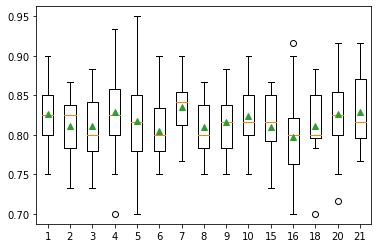

In [24]:
results = list()
strategies = [str(i) for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 18, 20, 21]]
for s in strategies:
    # create the modeling pipeline
    pipe = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=int(s))), ('model', KNeighborsClassifier())])
    # 数据多次随机划分取平均得分
    scores = []
    for k in range(20):
        # 得到训练集合和验证集合, 8: 2
        X_train, X_test, y_train, y_test = train_test_split(Xtrans, y, test_size=0.2)
        pipe.fit(X_train, y_train)
        # 验证model
        score = pipe.score(X_test, y_test)
        scores.append(score)
    # 保存results
    results.append(np.array(scores))
    print('>k: %s, Acc Mean: %.3f, Std: %.3f' % (s, np.mean(scores), np.std(scores)))
# print(results)
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

**Step 6: 结果分析**

我们的实验是每个k值下，随机切分20次数据, 从上述的图片中, 根据k值的增加，我们的测试准确率会有先上升再下降再上升的过程。
[3, 5]之间是一个很好的取值，上文我们提到，k很小的时候会发生过拟合，k很大时候会发生欠拟合，当遇到第一下降节点，此时我们可以
简单认为不在发生过拟合，取当前的k值即可。

## 2.5 KNN原理介绍

k近邻方法是一种惰性学习算法，可以用于回归和分类，它的主要思想是投票机制，对于一个测试实例x, 我们在有标签的训练数据集上找到和最相近的k个数据，用他们的label进行投票，分类问题则进行表决投票，回归问题使用加权平均或者直接平均的方法。knn算法中我们最需要关注两个问题：k值的选择和距离的计算。
kNN中的k是一个超参数，需要我们进行指定，一般情况下这个k和数据有很大关系，都是交叉验证进行选择，但是建议使用交叉验证的时候，k∈[2,20]，使用交叉验证得到一个很好的k值。

k值还可以表示我们的模型复杂度，当k值越小意味着模型复杂度变大，更容易过拟合，(用极少数的样例来绝对这个预测的结果，很容易产生偏见，这就是过拟合)。我们有这样一句话，k值越多学习的估计误差越小，但是学习的近似误差就会增大。

---

**距离/相似度的计算：**

样本之间的距离的计算，我们一般使用对于一般使用Lp距离进行计算。当p=1时候，称为曼哈顿距离(Manhattan distance)，当p=2时候，称为欧氏距离(Euclidean distance)，当p=∞时候，称为极大距离(infty distance), 表示各个坐标的距离最大值,另外也包含夹角余弦等方法。

一般采用欧式距离较多，但是文本分类则倾向于使用余弦来计算相似度。

对于两个向量$(x_i,x_j)$,一般使用$L_p$距离进行计算。 假设特征空间$X$是n维实数向量空间$R^n$ , 其中,$x_i,x_j \in X$,
$x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \ldots, x_{i}^{(n)}\right)$,$x_{j}=\left(x_{j}^{(1)}, x_{j}^{(2)}, \ldots, x_{j}^{(n)}\right)$
$x_i，x_j$的$L_p$距离定义为:
$$
L_{p}\left(x_{i}, x_{j}\right)=\left(\sum_{l=1}^{n}\left|x_{i}^{(l)}-x_{j}^{(l)}\right|^{p}\right)^{\frac{1}{p}}
$$

> 这里的$p\geq1$. 当$p=2$时候，称为欧氏距离(Euclidean distance)：
$$
L_{2}\left(x_{i}, x_{j}\right)=\left(\sum_{l=1}^{n}\left|x_{i}^{(l)}-x_{j}^{(l)}\right|^{2}\right)^{\frac{1}{2}}
$$

> 当$p=1$时候，称为曼哈顿距离(Manhattan distance)：
$$
L_{1}\left(x_{i}, x_{j}\right)=\sum_{l=1}^{n}\left|x_{i}^{(l)}-x_{j}^{(l)}\right|
$$
> 当$p=\infty$时候，称为极大距离(infty distance), 表示各个坐标的距离最大值：
$$
L_{p}\left(x_{i}, x_{j}\right)=\max _{l} n\left|x_{i}^{(l)}-x_{j}^{(l)}\right|
$$